In [125]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [126]:
df_1 = pd.read_csv("AAPL.csv")
df_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [127]:
df_1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

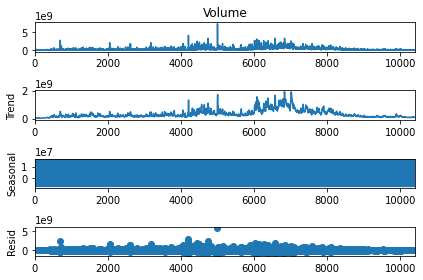

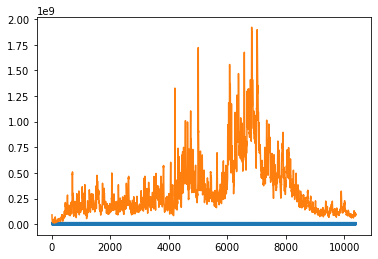

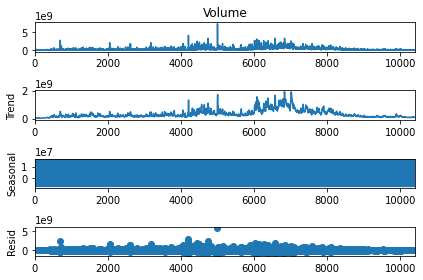

In [128]:
result = seasonal_decompose(df_1['Volume'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [129]:
df_1['rolling_mean'] = df_1['Volume'].rolling(window=12).mean()
df_1['rolling_standard_deviation'] = df_1['Volume'].rolling(window=12).std()

In [130]:
df_1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'rolling_mean', 'rolling_standard_deviation'],
      dtype='object')

In [131]:
import plotly.express as px

fig = px.line(df_1, x="Date", y = ['rolling_mean', 'rolling_standard_deviation'])
fig.show()

In [132]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_1.loc[:, 'Volume'].values, autolag = 'AIC')
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])
print("n_lags:", adf[2])
for key, value in adf[4].items():
    print("Critical values:", key, value)

ADF Statistic: -5.412082335116877
p-value: 3.1947999505753657e-06
n_lags: 33
Critical values: 1% -3.4309804499918704
Critical values: 5% -2.861818622502975
Critical values: 10% -2.5669183056141676


In [133]:
from statsmodels.tsa.stattools import kpss

kpss = kpss(df_1.loc[:, 'Volume'].values, regression = 'c')
print("KPSS Statistic:", kpss[0])
print("p-value:", kpss[1])
print("n_lags:", kpss[2])
for key, value in kpss[3].items():
    print("Critical values:", key, value)

KPSS Statistic: 3.4487587702301568
p-value: 0.01
n_lags: 57
Critical values: 10% 0.347
Critical values: 5% 0.463
Critical values: 2.5% 0.574
Critical values: 1% 0.739


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2011: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [134]:
df_2 = pd.read_csv("DailyDelhiClimateTest.csv")
df_2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


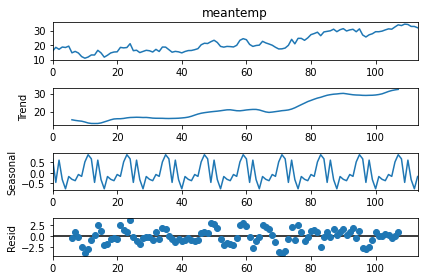

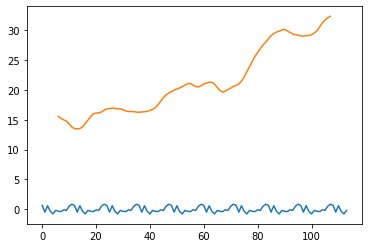

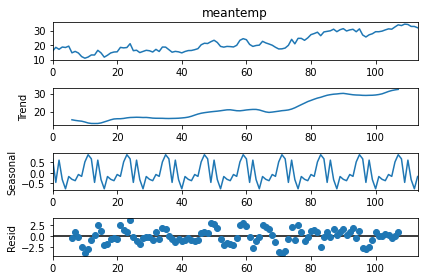

In [135]:
result = seasonal_decompose(df_2['meantemp'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [136]:
df_2['rolling_mean'] = df_2['meantemp'].rolling(window=12).mean()
df_2['rolling_standard_deviation'] = df_2['meantemp'].rolling(window=12).std()

In [137]:
fig = px.line(df_2, x="date", y = ['rolling_mean', 'rolling_standard_deviation'])
fig.show()

In [140]:
adf = adfuller(df_2.loc[:, 'meantemp'].values, autolag = 'AIC')
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])
print("n_lags:", adf[2])
for key, value in adf[4].items():
    print("Critical values:", key, value)

ADF Statistic: -1.0964742758756192
p-value: 0.7164758731775931
n_lags: 0
Critical values: 1% -3.489589552580676
Critical values: 5% -2.887477210140433
Critical values: 10% -2.580604145195395


In [146]:
kpss = kpss(df_2.loc[:, 'meantemp'].values, regression = 'c')
print("KPSS Statistic:", kpss[0])
print("p-value:", kpss[1])
print("n_lags:", kpss[2])
for key, value in kpss[3].items():
    print("Critical values:", key, value)

TypeError: 'tuple' object is not callable